=== Basic DICOM Metadata ===
Patient Name: SCTPT01^SCTPT01
Patient ID: SCTPT01
Modality: CT
Study Date: 20221226
Series Description: Deformed image export
Slice Thickness: 1
Pixel Spacing: [0.96165136990519, 0.96165136990519]

=== Pixel Data Statistics ===
Shape of pixel data: (512, 512)
Data type: float32
Min pixel intensity: -1000.0
Max pixel intensity: 1344.0
Mean pixel intensity: -772.7455
Standard deviation: 407.12094

=== HU Data Statistics ===
Min HU: -2000.0
Max HU: 344.0
Mean HU: -1772.7454
Standard deviation HU: 407.1209


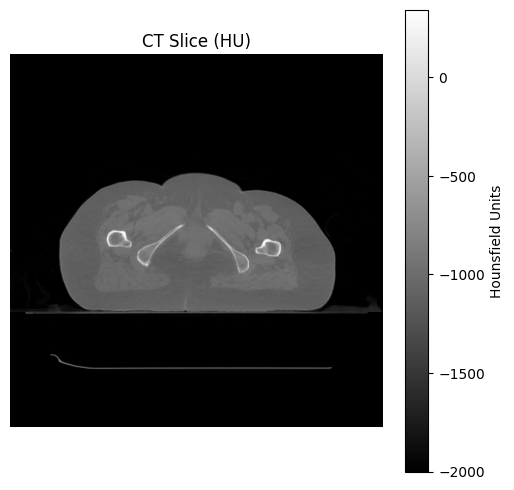

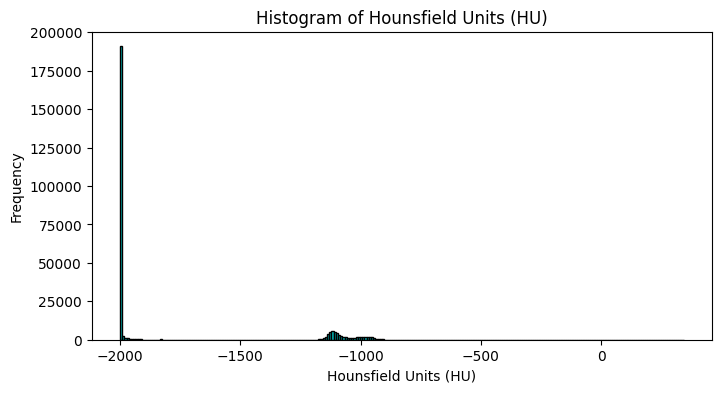

In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Set this to your DICOM file path
dicom_file_path = "../data/hf/CBCT/CT.1.2.246.352.205.4876191749781591279.12176416163633900424.dcm"

# Load the DICOM file
ds = pydicom.dcmread(dicom_file_path)

# --- Metadata EDA ---
print("=== Basic DICOM Metadata ===")
print("Patient Name:", ds.get('PatientName', 'N/A'))
print("Patient ID:", ds.get('PatientID', 'N/A'))
print("Modality:", ds.get('Modality', 'N/A'))
print("Study Date:", ds.get('StudyDate', 'N/A'))
print("Series Description:", ds.get('SeriesDescription', 'N/A'))
print("Slice Thickness:", ds.get('SliceThickness', 'N/A'))
print("Pixel Spacing:", ds.get('PixelSpacing', 'N/A'))

# --- Pixel Data EDA ---
# Extract pixel array from the dataset
pixel_array = ds.pixel_array.astype(np.float32)

# Extract Rescale Slope and Rescale Intercept
rescale_slope = float(ds.get('RescaleSlope', 1))  # Default to 1 if not available
rescale_intercept = float(ds.get('RescaleIntercept', 0))  # Default to 0 if not available

# Convert to Hounsfield Units (HU)
hu_array = pixel_array * rescale_slope + rescale_intercept

print("\n=== Pixel Data Statistics ===")
print("Shape of pixel data:", pixel_array.shape)
print("Data type:", pixel_array.dtype)
print("Min pixel intensity:", np.min(pixel_array))
print("Max pixel intensity:", np.max(pixel_array))
print("Mean pixel intensity:", np.mean(pixel_array))
print("Standard deviation:", np.std(pixel_array))

print("\n=== HU Data Statistics ===")
print("Min HU:", np.min(hu_array))
print("Max HU:", np.max(hu_array))
print("Mean HU:", np.mean(hu_array))
print("Standard deviation HU:", np.std(hu_array))

# --- Visualize the image ---
plt.figure(figsize=(6,6))
plt.imshow(hu_array, cmap='gray')
plt.title("CT Slice (HU)")
plt.colorbar(label='Hounsfield Units')
plt.axis('off')
plt.show()

# --- Histogram of HU ---
plt.figure(figsize=(8,4))
plt.hist(hu_array.flatten(), bins=256, color='c', edgecolor='black')
plt.title("Histogram of Hounsfield Units (HU)")
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()


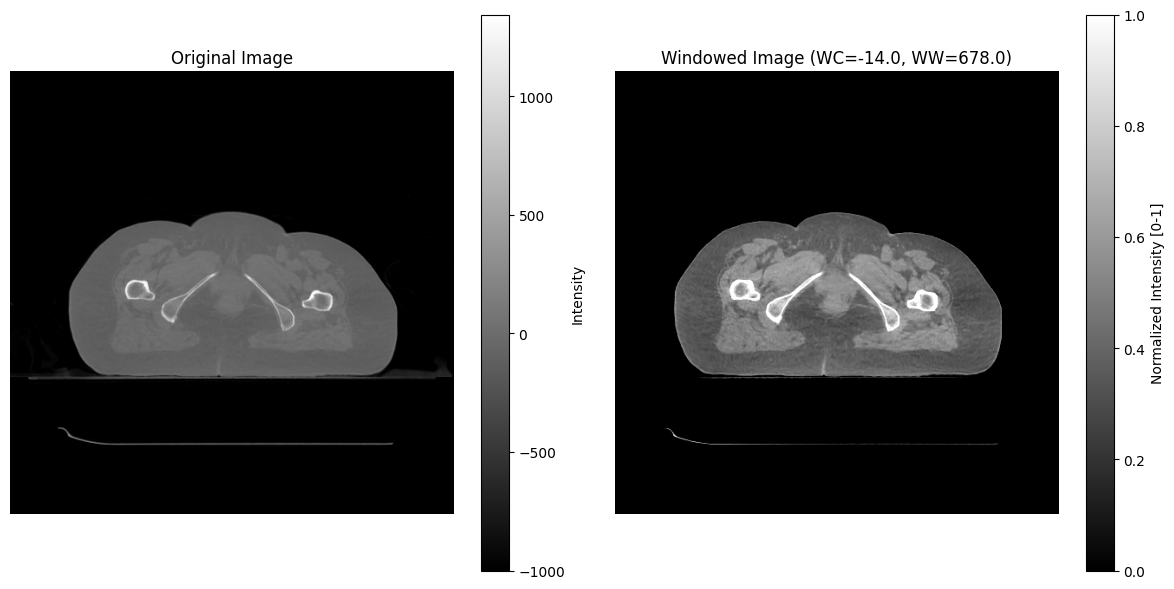

In [2]:
pixel_array = ds.pixel_array.astype(np.float32)

# Extract Window Center (WC) and Window Width (WW) from the DICOM (if available)
# Note: Some DICOMs may store them as lists; pick the first element if so.
window_centers = ds.get('WindowCenter', None)
window_widths = ds.get('WindowWidth', None)

# If the metadata contains multiple values, just use the first one for demonstration
if isinstance(window_centers, pydicom.multival.MultiValue):
    window_center = float(window_centers[0])
else:
    window_center = float(window_centers) if window_centers is not None else 40.0  # default fallback

if isinstance(window_widths, pydicom.multival.MultiValue):
    window_width = float(window_widths[0])
else:
    window_width = float(window_widths) if window_widths is not None else 400.0  # default fallback

# Define a function to apply windowing
def apply_window(pixel_array, center, width):
    """
    Apply linear windowing to the pixel intensity values.
    """
    # Convert pixel values to float for calculations
    img = pixel_array.copy().astype(np.float32)
    
    # Calculate the minimum and maximum values based on center and width
    lower_bound = center - (width / 2.0)
    upper_bound = center + (width / 2.0)
    
    # Clip values outside the window range
    img = np.clip(img, lower_bound, upper_bound)
    
    # Normalize to 0-1 range for display
    img = (img - lower_bound) / (width)
    return img

# Apply windowing
windowed_img = apply_window(pixel_array, window_center, window_width)

# Plot the original image (unwindowed) for comparison
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pixel_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.colorbar(label='Intensity')

# Plot the windowed image
plt.subplot(1,2,2)
plt.imshow(windowed_img, cmap='gray')
plt.title(f"Windowed Image (WC={window_center}, WW={window_width})")
plt.axis('off')
plt.colorbar(label='Normalized Intensity [0-1]')

plt.tight_layout()
plt.show()

=== Basic DICOM Metadata ===
Patient Name: SCTPT01^SCTPT01
Patient ID: SCTPT01
Modality: CT
Study Date: 20221226
Series Description: Deformed image export
Slice Thickness: 1
Pixel Spacing: [0.96165136990519, 0.96165136990519]

=== Pixel Data Statistics ===
Shape of pixel data: (512, 512)
Data type: float32
Min pixel intensity: 0.0
Max pixel intensity: 248.0
Mean pixel intensity: 22.67712
Standard deviation: 41.7097

=== HU Data Statistics ===
Min HU: -1000.0
Max HU: -752.0
Mean HU: -977.3229
Standard deviation HU: 41.7097


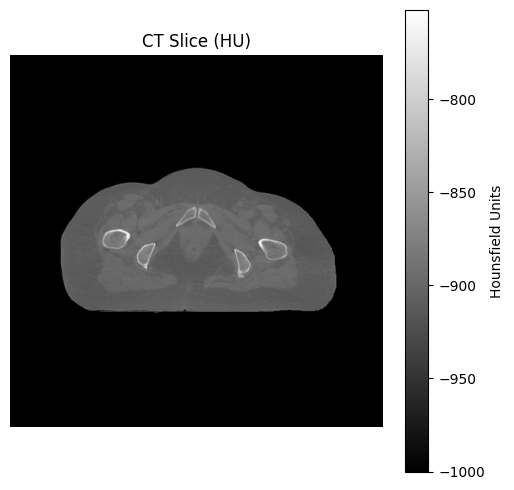

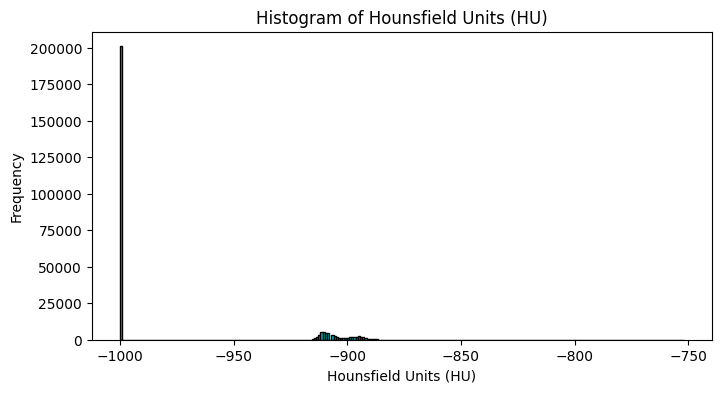

In [3]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Set this to your DICOM file path
dicom_file_path = "../data/hf_crop/CBCT/seg_CBCT_slice_018.dcm"

# Load the DICOM file
ds = pydicom.dcmread(dicom_file_path)

# --- Metadata EDA ---
print("=== Basic DICOM Metadata ===")
print("Patient Name:", ds.get('PatientName', 'N/A'))
print("Patient ID:", ds.get('PatientID', 'N/A'))
print("Modality:", ds.get('Modality', 'N/A'))
print("Study Date:", ds.get('StudyDate', 'N/A'))
print("Series Description:", ds.get('SeriesDescription', 'N/A'))
print("Slice Thickness:", ds.get('SliceThickness', 'N/A'))
print("Pixel Spacing:", ds.get('PixelSpacing', 'N/A'))

# --- Pixel Data EDA ---
# Extract pixel array from the dataset
pixel_array = ds.pixel_array.astype(np.float32)

# Extract Rescale Slope and Rescale Intercept
rescale_slope = float(ds.get('RescaleSlope', 1))  # Default to 1 if not available
rescale_intercept = float(ds.get('RescaleIntercept', 0))  # Default to 0 if not available

# Convert to Hounsfield Units (HU)
hu_array = pixel_array * rescale_slope + rescale_intercept

print("\n=== Pixel Data Statistics ===")
print("Shape of pixel data:", pixel_array.shape)
print("Data type:", pixel_array.dtype)
print("Min pixel intensity:", np.min(pixel_array))
print("Max pixel intensity:", np.max(pixel_array))
print("Mean pixel intensity:", np.mean(pixel_array))
print("Standard deviation:", np.std(pixel_array))

print("\n=== HU Data Statistics ===")
print("Min HU:", np.min(hu_array))
print("Max HU:", np.max(hu_array))
print("Mean HU:", np.mean(hu_array))
print("Standard deviation HU:", np.std(hu_array))

# --- Visualize the image ---
plt.figure(figsize=(6,6))
plt.imshow(hu_array, cmap='gray')
plt.title("CT Slice (HU)")
plt.colorbar(label='Hounsfield Units')
plt.axis('off')
plt.show()

# --- Histogram of HU ---
plt.figure(figsize=(8,4))
plt.hist(hu_array.flatten(), bins=256, color='c', edgecolor='black')
plt.title("Histogram of Hounsfield Units (HU)")
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Set this to your DICOM file path
dicom_file_path = "../data/raw/CT/CT.1.2.246.352.221.4751660787682788313.6893871410066094014.dcm"

# Load the DICOM file
ds = pydicom.dcmread(dicom_file_path)

# --- Metadata EDA ---
print("=== Basic DICOM Metadata ===")
print("Patient Name:", ds.get('PatientName', 'N/A'))
print("Patient ID:", ds.get('PatientID', 'N/A'))
print("Modality:", ds.get('Modality', 'N/A'))
print("Study Date:", ds.get('StudyDate', 'N/A'))
print("Series Description:", ds.get('SeriesDescription', 'N/A'))
print("Slice Thickness:", ds.get('SliceThickness', 'N/A'))
print("Pixel Spacing:", ds.get('PixelSpacing', 'N/A'))

# Extract rescale slope and intercept for HU conversion
rescale_slope = float(ds.get('RescaleSlope', 1))  # Default slope is 1
rescale_intercept = float(ds.get('RescaleIntercept', 0))  # Default intercept is 0

print("Rescale Slope:", rescale_slope)
print("Rescale Intercept:", rescale_intercept)

# --- Pixel Data EDA ---
# Extract pixel array and convert to float
pixel_array = ds.pixel_array.astype(np.float32)

# Convert pixel values to Hounsfield Units (HU)
hu_array = pixel_array * rescale_slope + rescale_intercept

# Clip the HU values to the range [-1000, 3000]
hu_clipped = np.clip(hu_array, -1000, 3000)

print("\n=== HU Pixel Data Statistics ===")
print("Shape of HU data:", hu_clipped.shape)
print("Data type:", hu_clipped.dtype)
print("Min HU intensity:", np.min(hu_clipped))
print("Max HU intensity:", np.max(hu_clipped))
print("Mean HU intensity:", np.mean(hu_clipped))
print("Standard deviation:", np.std(hu_clipped))

# --- Visualize the image ---
plt.figure(figsize=(6,6))
plt.imshow(hu_clipped, cmap='gray', vmin=-1000, vmax=3000)  # Set vmin/vmax to display range
plt.title("CT Slice (Hounsfield Units)")
plt.colorbar(label='Intensity (HU)')
plt.axis('off')
plt.show()

# --- Histogram of HU values ---
plt.figure(figsize=(8,4))
plt.hist(hu_clipped.flatten(), bins=256, color='c', edgecolor='black')
plt.title("Histogram of HU Values")
plt.xlabel("Hounsfield Unit (HU)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
pixel_array = ds.pixel_array.astype(np.float32)

# Extract Window Center (WC) and Window Width (WW) from the DICOM (if available)
# Note: Some DICOMs may store them as lists; pick the first element if so.
window_centers = ds.get('WindowCenter', None)
window_widths = ds.get('WindowWidth', None)

# If the metadata contains multiple values, just use the first one for demonstration
if isinstance(window_centers, pydicom.multival.MultiValue):
    window_center = float(window_centers[0])
else:
    window_center = float(window_centers) if window_centers is not None else 40.0  # default fallback

if isinstance(window_widths, pydicom.multival.MultiValue):
    window_width = float(window_widths[0])
else:
    window_width = float(window_widths) if window_widths is not None else 400.0  # default fallback

# Define a function to apply windowing
def apply_window(pixel_array, center, width):
    """
    Apply linear windowing to the pixel intensity values.
    """
    # Convert pixel values to float for calculations
    img = pixel_array.copy().astype(np.float32)
    
    # Calculate the minimum and maximum values based on center and width
    lower_bound = center - (width / 2.0)
    upper_bound = center + (width / 2.0)
    
    # Clip values outside the window range
    img = np.clip(img, lower_bound, upper_bound)
    
    # Normalize to 0-1 range for display
    img = (img - lower_bound) / (width)
    return img

# Apply windowing
windowed_img = apply_window(pixel_array, window_center, window_width)

# Plot the original image (unwindowed) for comparison
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pixel_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.colorbar(label='Intensity')

# Plot the windowed image
plt.subplot(1,2,2)
plt.imshow(windowed_img, cmap='gray')
plt.title(f"Windowed Image (WC={window_center}, WW={window_width})")
plt.axis('off')
plt.colorbar(label='Normalized Intensity [0-1]')

plt.tight_layout()
plt.show()

In [ ]:
import os
import pydicom
import numpy as np
import imageio
from IPython.display import Image

dicom_dir = "data/CT"
files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith(".dcm")]
files.sort()

images = []
for f in files:
    ds = pydicom.dcmread(f)
    # Check if we have pixel data
    if 'PixelData' not in ds:
        print(f"Skipping {f} - no PixelData")
        continue
    
    pixel_array = ds.pixel_array
    images.append(pixel_array)

if not images:
    raise ValueError("No image files found with pixel data.")

# Normalize and create a GIF if we have images
images_uint8 = []
for img in images:
    img_float = img.astype(np.float32)
    img_norm = 255 * (img_float - img_float.min()) / (img_float.max() - img_float.min())
    img_uint8 = img_norm.astype(np.uint8)
    images_uint8.append(img_uint8)

gif_path = "ct_scan.gif"
imageio.mimsave(gif_path, images_uint8, duration=0.1)
Image(filename=gif_path)


In [ ]:
import os
import pydicom
import numpy as np
import imageio
from IPython.display import Image

dicom_dir = "data/CBCT"
files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith(".dcm")]
files.sort()

images = []
for f in files:
    ds = pydicom.dcmread(f)
    # Check if we have pixel data
    if 'PixelData' not in ds:
        print(f"Skipping {f} - no PixelData")
        continue
    
    pixel_array = ds.pixel_array
    images.append(pixel_array)

if not images:
    raise ValueError("No image files found with pixel data.")

# Normalize and create a GIF if we have images
images_uint8 = []
for img in images:
    img_float = img.astype(np.float32)
    img_norm = 255 * (img_float - img_float.min()) / (img_float.max() - img_float.min())
    img_uint8 = img_norm.astype(np.uint8)
    images_uint8.append(img_uint8)

gif_path = "cbct_scan.gif"
imageio.mimsave(gif_path, images_uint8, duration=0.1)
Image(filename=gif_path)

In [ ]:
import os
import pydicom
import numpy as np
import pyvista as pv

# Directory containing the DICOM slices
dicom_dir = "data/CT"
files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith(".dcm")]
files.sort()

# Read the slices and stack them into a 3D volume
slices = []
for f in files:
    ds = pydicom.dcmread(f)
    if 'PixelData' not in ds:
        # Skip files that don't contain pixel data
        continue
    img = ds.pixel_array.astype(np.int16)  # typical CT data is int16
    slices.append(img)

# Ensure we have a volume
if not slices:
    raise ValueError("No image slices found with pixel data.")

volume = np.stack(slices, axis=0)  # shape: (num_slices, height, width)

# Optional: Set spacing from DICOM metadata if available
# This helps preserve correct aspect ratio in 3D space
# Typically: ds.SliceThickness for z-spacing and ds.PixelSpacing for x/y spacing
z_spacing = float(ds.SliceThickness) if 'SliceThickness' in ds else 1.0
y_spacing, x_spacing = (float(ds.PixelSpacing[0]), float(ds.PixelSpacing[1])) if 'PixelSpacing' in ds else (1.0, 1.0)

# Create a PyVista UniformGrid
# The volume shape is (Z, Y, X)
grid = pv.UniformGrid()
grid.dimensions = volume.shape  # The shape of the data along x, y, z
grid.spacing = (x_spacing, y_spacing, z_spacing)  # spacing along each axis
grid.origin = (0,0,0)   # you can adjust if needed
grid.point_data["values"] = volume.ravel(order="F")  # note the order for flattening

# Volume rendering with PyVista
p = pv.Plotter()
# Add volume rendering - you can adjust the transfer function, opacity, etc.
p.add_volume(grid, cmap="gray", opacity='sigmoid', shade=True)
p.show()


In [ ]:
import os
import pydicom
import numpy as np
import pyvista as pv

# Directory containing DICOM slices
dicom_dir = "data/CBCT"
files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith(".dcm")]
files.sort()

# Load the pixel data from the DICOM slices
slices = []
for f in files:
    ds = pydicom.dcmread(f)
    if 'PixelData' not in ds:
        continue
    img = ds.pixel_array.astype(np.int16)  # CT images are often stored as int16
    slices.append(img)

if not slices:
    raise ValueError("No image slices found with pixel data.")

# Create a 3D volume (H, W, D)
volume = np.stack(slices, axis=-1)

# Retrieve voxel spacing from DICOM metadata if available
# Often found under ds.PixelSpacing (x,y) and ds.SliceThickness (z)
# Make sure all slices are from the same series and have consistent spacing.
pixel_spacing = ds.PixelSpacing if hasattr(ds, 'PixelSpacing') else [1.0, 1.0]
slice_thickness = float(ds.SliceThickness) if hasattr(ds, 'SliceThickness') else 1.0
spacing = (pixel_spacing[0], pixel_spacing[1], slice_thickness)

# Create a UniformGrid: PyVista uses F-order (Fortran) indexing, so we may need to reorder
grid = pv.UniformGrid()
grid.dimensions = volume.shape
grid.spacing = spacing
grid.origin = (0, 0, 0)
# Flatten the volume in Fortran order since pyvista expects this
grid.point_data["values"] = volume.ravel(order="F")

# Use a PyVista Plotter to visualize
# Note: For Jupyter, set notebook=True and choose a backend that supports interactivity.
# The 'pythreejs' backend can provide an interactive 3D widget in notebooks.
p = pv.Plotter(notebook=True)
p.add_volume(grid, scalars="values", cmap="gray", opacity='linear')
p.show(jupyter_backend='pythreejs')

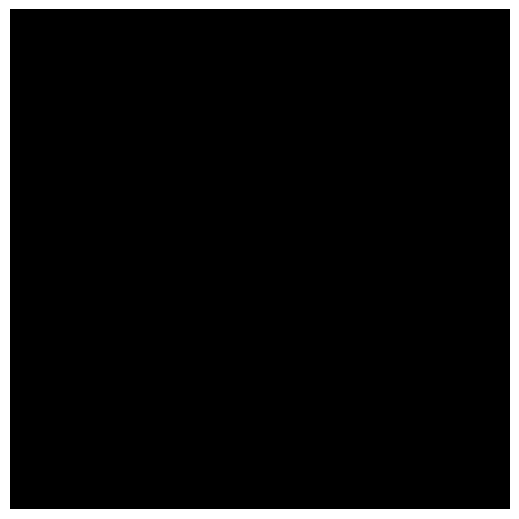

In [1]:
import os
import glob
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def load_dicom(filepath):
    """Load a DICOM file and return its pixel array as a float32 numpy array."""
    ds = pydicom.dcmread(filepath)
    if 'PixelData' not in ds:
        return None
    return ds.pixel_array.astype(np.float32)

def load_dicom_line(path):
    """Load DICOM files from a directory, sort them by available metadata, and return a list of images."""
    file_paths = glob.glob(os.path.join(path, "*"))
    
    # Read all DICOM files with pixel data
    dicoms = []
    for fp in file_paths:
        try:
            ds = pydicom.dcmread(fp)
            if 'PixelData' in ds:
                dicoms.append(ds)
        except Exception:
            # Skip non-DICOM or unreadable files
            continue

    if not dicoms:
        return []
    
    # Attempt to sort by ImagePositionPatient's z coordinate if available
    if all(hasattr(d, 'ImagePositionPatient') for d in dicoms):
        try:
            dicoms.sort(key=lambda d: float(d.ImagePositionPatient[2]))
        except Exception:
            pass
    # Fallback to sorting by SliceLocation if available
    elif all(hasattr(d, 'SliceLocation') for d in dicoms):
        try:
            dicoms.sort(key=lambda d: float(d.SliceLocation))
        except Exception:
            pass
    # Next fallback: sort by InstanceNumber
    elif all(hasattr(d, 'InstanceNumber') and d.InstanceNumber is not None for d in dicoms):
        try:
            dicoms.sort(key=lambda d: int(d.InstanceNumber))
        except Exception:
            dicoms.sort(key=lambda d: d.filename)
    else:
        # Final fallback: sort by filename
        dicoms.sort(key=lambda d: d.filename)
    
    images = []
    for d in dicoms:
        data = d.pixel_array.astype(np.float32)
        if data.max() == 0:
            continue
        images.append(data)

    return images

def create_animation(ims):
    """Create an animation from a list of image arrays without white borders."""
    # Create figure and axis with no margins
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axis('off')  # Remove axes
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)  # Remove margins
    
    im = ax.imshow(ims[0], cmap="gray")
    plt.imsave("test.png", ims[0], cmap='gray')
    
    def animate_func(i):
        im.set_array(ims[i])
        return [im]
    
    anim = animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=250)
    return anim

# Load CT images
ct_images = load_dicom_line("../data/regis/sCT")
anm_ct = create_animation(ct_images)

# Display in notebook (optional) 
HTML(anm_ct.to_jshtml())

In [ ]:
# Save as GIF using pillow writer
anm_ct.save("../assets/raw_cbct_animation.gif", writer='pillow', fps=10)

In [ ]:
# Load CBCT images
cbct_images = load_dicom_line("../data/hf_crop/CT")
anm_cbct = create_animation(cbct_images)
HTML(anm_cbct.to_jshtml())

In [ ]:
anm_cbct.save("../assets/raw_ct_animation.gif", writer='pillow', fps=10)

In [ ]:
# Install required packages if not already installed
# !pip install pydicom matplotlib numpy

import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Paths to your DICOM files (one CT, one CBCT)
ct_dicom_path = "data/CT/CT.1.2.246.352.221.4934973614153931625.14887282885768127625.dcm"
cbct_dicom_path = "data/CBCT/CT.1.2.246.352.221.5157084289719062230.903187211093794223.dcm"


# Load DICOM files
ds_ct = pydicom.dcmread(ct_dicom_path)
ds_cbct = pydicom.dcmread(cbct_dicom_path)

# --- Extract CT pixel data and convert to HU ---
ct_pixels = ds_ct.pixel_array.astype(np.float32)
# HU conversion based on DICOM tags for CT:
# HU = pixel_value * RescaleSlope + RescaleIntercept
rescale_slope = ds_ct.get('RescaleSlope', 1)
rescale_intercept = ds_ct.get('RescaleIntercept', 0)
ct_hu = ct_pixels * rescale_slope + rescale_intercept

# --- Extract CBCT pixel data ---
cbct_pixels = ds_cbct.pixel_array.astype(np.float32)
# NOTE: CBCT pixel values are often device-specific and may not be in standard HU.
# For now, we take these values as-is. If you have a known calibration method, apply it here.

# --- Print Basic Statistics ---
print("=== CT HU Statistics ===")
print("Min HU:", np.min(ct_hu))
print("Max HU:", np.max(ct_hu))
print("Mean HU:", np.mean(ct_hu))
print("Std Dev HU:", np.std(ct_hu))

print("\n=== CBCT Intensity Statistics (Not True HU) ===")
print("Min Intensity:", np.min(cbct_pixels))
print("Max Intensity:", np.max(cbct_pixels))
print("Mean Intensity:", np.mean(cbct_pixels))
print("Std Dev Intensity:", np.std(cbct_pixels))

# --- Histograms for Comparison ---
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(ct_hu.flatten(), bins=256, color='b', alpha=0.7, edgecolor='black')
plt.title("CT HU Distribution")
plt.xlabel("HU")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(cbct_pixels.flatten(), bins=256, color='r', alpha=0.7, edgecolor='black')
plt.title("CBCT Intensity Distribution")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# --- Visualization of Slices ---
fig, axes = plt.subplots(1,2, figsize=(12,6))

axes[0].imshow(ct_hu, cmap='gray')
axes[0].set_title("CT (HU)")
axes[0].axis('off')

axes[1].imshow(cbct_pixels, cmap='gray')
axes[1].set_title("CBCT (Raw Intensity)")
axes[1].axis('off')

plt.show()

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# File paths for the two DICOM files
dicom_file_paths = [
    "data/raw/CBCT/CT.1.2.246.352.205.4660454100137058996.4800291249315897485.dcm",
    "data/raw/CT/CT.1.2.246.352.221.4628345167361495129.13651450891985657233.dcm"
]

def load_and_process_dicom(file_path, hu_range=(-1000, 3000)):
    """Load a DICOM file, convert it to HU, and clip to the specified range."""
    ds = pydicom.dcmread(file_path)
    pixel_array = ds.pixel_array.astype(np.float32)
    rescale_slope = float(ds.get('RescaleSlope', 1))
    rescale_intercept = float(ds.get('RescaleIntercept', 0))
    hu_array = pixel_array * rescale_slope + rescale_intercept
    hu_clipped = np.clip(hu_array, *hu_range)
    return hu_clipped

# Process both DICOM files
processed_images = [load_and_process_dicom(path) for path in dicom_file_paths]

# Visualize the images side by side
plt.figure(figsize=(12, 6))

titles = ["CBCT Slice (Hounsfield Units)", "CT Slice (Hounsfield Units)"]
for i, img in enumerate(processed_images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.colorbar(label='Intensity (HU)')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# File path for the CT DICOM file
ct_file_path = "data/raw/CT/CT.1.2.246.352.221.4628345167361495129.13651450891985657233.dcm"

def load_and_process_dicom(file_path, hu_range=(-1000, 3000)):
    """
    Load a DICOM file, convert its pixel data to Hounsfield Units (HU),
    and clip the values to the specified HU range.
    """
    ds = pydicom.dcmread(file_path)
    # Convert pixel data to float for processing
    pixel_array = ds.pixel_array.astype(np.float32)
    # Get rescale parameters; default to 1 and 0 if they don't exist
    rescale_slope = float(ds.get('RescaleSlope', 1))
    rescale_intercept = float(ds.get('RescaleIntercept', 0))
    # Convert to HU using the formula: HU = pixel_value * slope + intercept
    hu_array = pixel_array * rescale_slope + rescale_intercept
    # Clip the HU values to the provided range
    hu_clipped = np.clip(hu_array, *hu_range)
    return hu_clipped

# Load the original CT image (without any HU conversion)
ds = pydicom.dcmread(ct_file_path)
original_ct = ds.pixel_array.astype(np.float32)  # Original raw pixel intensities

# Process the CT image to obtain the HU-converted version
processed_ct = load_and_process_dicom(ct_file_path)

# Visualize the images side by side
plt.figure(figsize=(12, 6))

# Define titles for the subplots
titles = ["Original CT Image", "CT Image with HU Range"]
images = [original_ct, processed_ct]

for i, img in enumerate(images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.colorbar(label='Intensity')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# File paths for the two DICOM files
dicom_file_paths = [
    "data/CBCT/CT.1.2.246.352.221.4934973614153931625.14887282885768127625.dcm",
    "data/CT/CT.1.2.246.352.221.5157084289719062230.903187211093794223.dcm"
]

def load_and_process_dicom(file_path, hu_range=(-1000, 3000), norm_range=(-1, 1)):
    """
    Load a DICOM file, convert it to HU, clip to the HU range, 
    and normalize intensities to the specified range.
    """
    ds = pydicom.dcmread(file_path)
    pixel_array = ds.pixel_array.astype(np.float32)
    
    # Convert to HU
    rescale_slope = float(ds.get('RescaleSlope', 1))
    rescale_intercept = float(ds.get('RescaleIntercept', 0))
    hu_array = pixel_array * rescale_slope + rescale_intercept
    
    # Clip to HU range
    hu_clipped = np.clip(hu_array, *hu_range)
    
    # Normalize to [-1, 1]
    min_hu, max_hu = hu_range
    min_norm, max_norm = norm_range
    normalized = (hu_clipped - min_hu) / (max_hu - min_hu) * (max_norm - min_norm) + min_norm
    
    return normalized

def align_images(image1, image2, offset_y1, offset_y2):
    """
    Align two images by cropping them to the same anatomical region.
    The offset_y1 and offset_y2 specify the bottom cropping limits for image1 and image2 respectively.
    """
    height1 = image1.shape[0] - offset_y1  # Determine height after cropping bottom for image1
    height2 = image2.shape[0] - offset_y2  # Determine height after cropping bottom for image2
    height = min(height1, height2)  # Use the smallest remaining height for alignment
    aligned_image1 = image1[:height, :]
    aligned_image2 = image2[:height, :]
    return aligned_image1, aligned_image2

# Process the DICOM files
normalized_cbct = load_and_process_dicom(dicom_file_paths[0])
normalized_ct = load_and_process_dicom(dicom_file_paths[1])

# Define offsets for cropping the bottom of the images
offset_cbct = 50  # Adjust as needed for CBCT image
offset_ct = 150   # Adjust as needed for CT image

# Align the images
aligned_cbct, aligned_ct = align_images(normalized_cbct, normalized_ct, offset_cbct, offset_ct)

# Visualize the aligned images side by side
plt.figure(figsize=(12, 6))

titles = ["Aligned CBCT Slice (Normalized)", "Aligned CT Slice (Normalized)"]
aligned_images = [aligned_cbct, aligned_ct]
for i, img in enumerate(aligned_images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img, cmap='gray', vmin=-1, vmax=1)
    plt.title(titles[i])
    plt.colorbar(label='Normalized Intensity')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Animation rescale

In [ ]:
import os
import glob
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def load_dicom(filepath):
    """Load a DICOM file and return its pixel array as a float32 numpy array."""
    ds = pydicom.dcmread(filepath)
    if 'PixelData' not in ds:
        return None
    return ds.pixel_array.astype(np.float32)

def load_dicom_line(path):
    file_paths = glob.glob(os.path.join(path, "*"))
    
    # Read all DICOMs with pixel data
    dicoms = []
    for fp in file_paths:
        try:
            ds = pydicom.dcmread(fp)
            if 'PixelData' in ds:
                dicoms.append(ds)
        except:
            # Skip non-DICOM or unreadable files
            pass

    # Sort by InstanceNumber if available
    if all(hasattr(d, 'InstanceNumber') and d.InstanceNumber is not None for d in dicoms):
        try:
            dicoms.sort(key=lambda d: int(d.InstanceNumber))
        except (TypeError, ValueError):
            # fallback to filename sorting
            dicoms.sort(key=lambda d: d.filename)
    else:
        # fallback to filename sorting
        dicoms.sort(key=lambda d: d.filename)

    images = []
    for d in dicoms:
        # Extract rescale slope and intercept for HU conversion
        rescale_slope = float(d.get('RescaleSlope', 1))  # Default slope is 1
        rescale_intercept = float(d.get('RescaleIntercept', 0))  # Default intercept is 0

        # Convert pixel data to HU
        data = d.pixel_array.astype(np.float32) * rescale_slope + rescale_intercept

        # Clip the HU values to the range [-1000, 3000]
        data = np.clip(data, -1000, 3000)
        
        if data.max() == 0:
            continue
        images.append(data)

    return images

def create_animation(ims):
    fig = plt.figure(figsize=(5, 5))
    plt.axis('off')
    im = plt.imshow(ims[0], cmap="gray", vmin=-1000, vmax=3000)  # Set display range

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    anim = animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=250)
    return anim

# Load CT images
ct_images = load_dicom_line("data/CT")
anm_ct = create_animation(ct_images)

# Display in notebook (optional)
HTML(anm_ct.to_jshtml())

In [ ]:
anm_ct.save("ct_animation-rescale.gif", writer='pillow', fps=10)

In [ ]:
from moviepy import VideoFileClip
from PIL import Image, ImageSequence

# Step 1: Convert MP4 to GIF
def convert_mp4_to_gif(mp4_path, gif_path):
    clip = VideoFileClip(mp4_path)
    clip.write_gif(gif_path, fps=10)
    print(f"GIF saved at {gif_path}")

# Step 2: Resize GIF (Non-Aspect Ratio)
def resize_gif(input_gif, output_gif, width, height):
    with Image.open(input_gif) as img:
        frames = []
        for frame in ImageSequence.Iterator(img):
            # Resize each frame
            new_frame = frame.resize((width, height), Image.Resampling.LANCZOS)
            frames.append(new_frame)
        # Save the resized GIF
        frames[0].save(
            output_gif,
            save_all=True,
            append_images=frames[1:],
            loop=0,
            duration=img.info.get('duration', 100),
        )
    print(f"Resized GIF saved at {output_gif}")

# Example Usage
mp4_path = "regis.mov"  # Your MP4 file path
gif_path = "output.gif"       # Temporary GIF path
resized_gif_path = "resized_output.gif"  # Resized GIF path
target_width = 800  # Desired width
target_height = 460  # Desired height

# Convert MP4 to GIF
convert_mp4_to_gif(mp4_path, gif_path)

# Resize the GIF
resize_gif(gif_path, resized_gif_path, target_width, target_height)


In [ ]:
import os
import glob
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # For saving PNG images

def count_and_save_pngs(dicom_folder, output_folder="output_pngs"):
    """
    Count the number of DICOM files with valid pixel data and save the images as PNG files.
    
    Parameters:
    - dicom_folder: Path to the folder containing DICOM files.
    - output_folder: Path to the folder to save PNG images.
    
    Returns:
    - A tuple with the total DICOM files, valid DICOMs with images, and PNG files saved.
    """
    os.makedirs(output_folder, exist_ok=True)
    file_paths = glob.glob(os.path.join(dicom_folder, "*"))
    
    total_dicom_files = len(file_paths)
    valid_dicom_count = 0
    saved_png_count = 0
    
    for fp in file_paths:
        try:
            ds = pydicom.dcmread(fp)
            if 'PixelData' in ds:
                valid_dicom_count += 1
                
                # Extract pixel data
                data = ds.pixel_array.astype(np.float32)
                
                # Apply rescale slope and intercept
                rescale_slope = float(ds.get('RescaleSlope', 1))
                rescale_intercept = float(ds.get('RescaleIntercept', 0))
                data = data * rescale_slope + rescale_intercept
                
                # Normalize and scale to 8-bit (0-255) for saving as PNG
                data = np.clip(data, -1000, 3000)  # Clip to the HU range [-1000, 3000]
                data = (data - (-1000)) / (3000 - (-1000)) * 255
                data = data.astype(np.uint8)
                
                # Save as PNG
                output_file = os.path.join(output_folder, f"{os.path.basename(fp)}.png")
                Image.fromarray(data).save(output_file)
                saved_png_count += 1
        except Exception as e:
            # Handle errors like non-DICOM files or unreadable data
            pass
    
    return total_dicom_files, valid_dicom_count, saved_png_count

# Analyze the DICOM folder and save PNGs
dicom_folder = "data/CT"
output_folder = "output_pngs"
total_files, valid_dicom, png_count = count_and_save_pngs(dicom_folder, output_folder)

print(f"Total files in folder: {total_files}")
print(f"Valid DICOM files with images: {valid_dicom}")
print(f"Saved PNG images: {png_count}")


In [ ]:
import os
import glob
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def load_dicom(filepath):
    """Load a DICOM file and return its pixel array as a float32 numpy array."""
    ds = pydicom.dcmread(filepath)
    if 'PixelData' not in ds:
        return None
    return ds.pixel_array.astype(np.float32)

def load_dicom_line(path):
    file_paths = glob.glob(os.path.join(path, "*"))
    
    # Read all DICOMs with pixel data
    dicoms = []
    for fp in file_paths:
        try:
            ds = pydicom.dcmread(fp)
            if 'PixelData' in ds:
                dicoms.append(ds)
        except:
            # Skip non-DICOM or unreadable files
            pass

    # Sort by InstanceNumber if available
    if all(hasattr(d, 'InstanceNumber') and d.InstanceNumber is not None for d in dicoms):
        try:
            dicoms.sort(key=lambda d: int(d.InstanceNumber))
        except (TypeError, ValueError):
            # Fallback to filename sorting
            dicoms.sort(key=lambda d: d.filename)
    else:
        # Fallback to filename sorting
        dicoms.sort(key=lambda d: d.filename)

    images = []
    for d in dicoms:
        # Extract rescale slope and intercept for HU conversion
        rescale_slope = float(d.get('RescaleSlope', 1))  # Default slope is 1
        rescale_intercept = float(d.get('RescaleIntercept', 0))  # Default intercept is 0

        # Convert pixel data to HU
        data = d.pixel_array.astype(np.float32) * rescale_slope + rescale_intercept

        # Clip the HU values to the range [-1000, 3000]
        data = np.clip(data, -1000, 3000)
        
        if data.max() == 0:
            continue
        images.append(data)

    return images

def create_animation(ims):
    fig = plt.figure(figsize=(5, 5))
    plt.axis('off')
    im = plt.imshow(ims[0], cmap="gray", vmin=-1000, vmax=3000)  # Set display range

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    anim = animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=250)
    return anim

# Load CT images
ct_images = load_dicom_line("data/CT")
print(f"Number of images loaded: {len(ct_images)}")

# Save images as PNG
output_dir = "png_images"
os.makedirs(output_dir, exist_ok=True)

for idx, img in enumerate(ct_images):
    filename = os.path.join(output_dir, f"image_{idx+1}.png")
    plt.imsave(filename, img, cmap='gray', vmin=-1000, vmax=3000)
    print(f"Saved {filename}")

# Create animation (optional)
anm_ct = create_animation(ct_images)

# Display in notebook (optional)
HTML(anm_ct.to_jshtml())

In [ ]:
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load DICOM file
dicom_path =  "data/CBCT/CT.1.2.246.352.221.4934973614153931625.14887282885768127625.dcm"
dicom_data = pydicom.dcmread(dicom_path)

# Extract pixel data
image = dicom_data.pixel_array

# Normalize pixel values for better visualization
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Thresholding to separate anatomy
_, binary_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)

# Remove small artifacts or noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

# Find contours to isolate the largest connected component (the patient anatomy)
contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask for the anatomy
anatomy_mask = np.zeros_like(image)
cv2.drawContours(anatomy_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

# Apply the mask to the original image
anatomy_only = cv2.bitwise_and(image, image, mask=anatomy_mask)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Anatomy Only")
plt.imshow(anatomy_only, cmap="gray")
plt.show()


In [ ]:
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load DICOM file
dicom_path =  "../data/raw/CBCT/CT.1.2.246.352.205.4920254911755495069.10075352108889448343.dcm"
dicom_data = pydicom.dcmread(dicom_path)

# Extract pixel data
image = dicom_data.pixel_array

# Normalize pixel values for better visualization
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Thresholding to separate anatomy
_, binary_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)

# Remove small artifacts or noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

# Find contours to isolate the largest connected component (the patient anatomy)
contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask for the anatomy
anatomy_mask = np.zeros_like(image)
cv2.drawContours(anatomy_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

# Apply the mask to the original image
anatomy_only = cv2.bitwise_and(image, image, mask=anatomy_mask)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Anatomy Only")
plt.imshow(anatomy_only, cmap="gray")
plt.show()